In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import torch
from itertools import combinations
from Openseas_Methods import *
import networkx
from tqdm import tqdm
from torch_geometric.utils.convert import from_networkx
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
from graph_utils import *
from network_utils import *
from GraphDataset import GraphDataset
import random
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dataset = GraphDataset('dataset_stor/graph_dataset_4',normalize=True)

12381
12282


In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# gcn = GCN().to(device)
gcn = torch.load('train_model_slurm.pt').to(device)

In [9]:
loader = DataLoader(dataset, batch_size=1)
optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()
criterion = torch.nn.MSELoss()
gcn = train_node_classifier(gcn, loader, optimizer_gcn, criterion,3000,print_every=5,bin=False,best_val=30000,outpath='test_model.pt')
test_acc(gcn,loader,criterion,bin=False)

# test_acc = eval_node_classifier(gcn, graph_2, graph_2.test_mask,criterion,bin=False)
# print(f'Test Acc: {test_acc:.3f}')
# test_acc = plot_test(gcn, graph, graph.test_mask)


Epoch: 005, Train Loss: 26252.844
 Val Acc: 28389.424
Epoch: 010, Train Loss: 26153.453
 Val Acc: 28779.778
Epoch: 015, Train Loss: 26120.445
 Val Acc: 28412.123
Epoch: 020, Train Loss: 26071.961
 Val Acc: 28586.676
Epoch: 025, Train Loss: 26119.711
 Val Acc: 29261.164



KeyboardInterrupt



Model Loss:546.2886962890625
Random Loss:808.8538208007812
Model Loss:567.3270263671875
Random Loss:773.1461791992188
Model Loss:713.6702880859375
Random Loss:908.6640625
Model Loss:649.6415405273438
Random Loss:838.8030395507812
Model Loss:603.1188354492188
Random Loss:764.0
Model Loss:544.725341796875
Random Loss:756.7481079101562
Model Loss:578.7459716796875
Random Loss:881.4491577148438
Model Loss:578.9515380859375
Random Loss:794.48486328125
Model Loss:617.4207153320312
Random Loss:782.888916015625
Model Loss:618.468505859375
Random Loss:870.0270385742188
Model Loss:478.0894775390625
Random Loss:798.3309326171875
Model Loss:605.35986328125
Random Loss:873.3706665039062
Model Loss:448.77288818359375
Random Loss:674.0844116210938
Model Loss:538.0601806640625
Random Loss:805.1103515625
Model Loss:639.39208984375
Random Loss:756.2977294921875
Model Loss:596.6596069335938
Random Loss:752.2713012695312
Model Loss:647.22412109375
Random Loss:818.1239624023438
Model Loss:560.517822265625


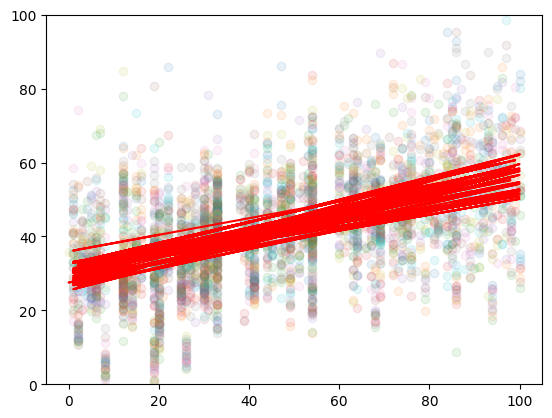

In [5]:
criterion = torch.nn.MSELoss()
loader = DataLoader(dataset, batch_size=1)
for graph in loader:
    test_acc = plot_test(gcn,graph,graph.test_mask,criterion)
    # plt.show()
    del test_acc

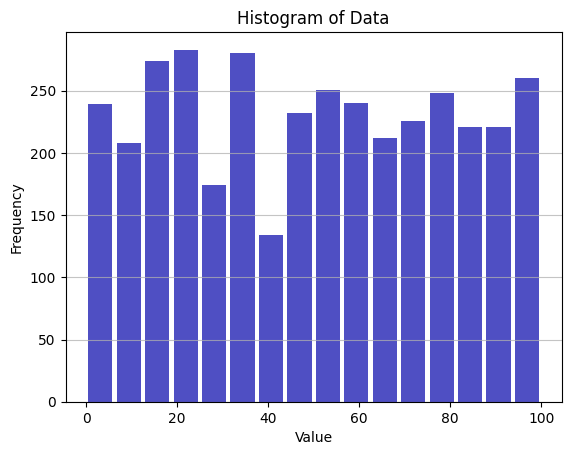

In [11]:
mask = graph_2.collection
plt.hist(graph_2.y[mask].cpu().detach(), bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

In [21]:
stats = label_to_stats.values()
floors = [x[0] for x in stats if x[0] is not None]
quantiles = make_quantiles(floors,10)
print(quantiles)
z_floor = [x for x in floors if x==0]

[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 8.000000e-04 3.000000e-03 6.900000e-03 1.098904e-02 3.800000e-02
 1.000000e+14]
